In [1]:
import re

import pytz as tz
from datetime import datetime

import numpy as np
np.random.seed(1337)

import xlrd

import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

plt.style.use('ggplot')

In [3]:
import os
import shutil

datadir = '../data'

In [20]:
filename = os.path.join(datadir, 'dataset1.xls')

In [21]:
df = pd.read_excel(filename)

In [22]:
df.head(10)

,EDAD,GENERO,CESTADOCIVIL,CTIPOPERSONA,CACTIVIDAD_SECUNDARIA,TIPORESIDENCIA,NUMEROCARGAS,CNIVELEDUCACION,CFUENTEINGRESO,EGRESOS,...,VALORES4,VALORES5,VALORES6,VALORESP1,VALORESP2,VALORESP3,VALORESP4,VALORESP5,VALORESP6,IMPAGO
0,39.0,M,3.0,NAT,J09,A,0.0,2.0,5.0,1602.46,...,494.34,494.34,494.34,210.72,351.42,352.48,381.50,429.05,427.11,0
1,29.0,M,1.0,NAT,S05,F,0.0,2.0,9.0,124.01,...,196.25,196.25,196.25,159.12,161.36,195.26,165.93,168.27,194.69,0
2,30.0,F,1.0,NAT,S05,F,0.0,4.0,9.0,4192.86,...,279.17,279.17,279.17,312.59,279.17,100.31,279.17,102.68,279.17,0
3,33.0,F,3.0,NAT,S05,F,0.0,2.0,8.0,125.56,...,246.97,246.97,246.97,233.72,179.05,244.98,184.13,246.97,252.39,0
4,36.0,F,2.0,NAT,J09,N,2.0,1.0,5.0,8585.44,...,1232.98,1232.98,1232.98,833.51,845.24,1221.57,869.22,881.46,893.87,0
5,44.0,M,2.0,NAT,J09,N,2.0,1.0,5.0,1230.73,...,561.39,561.39,561.39,406.25,239.61,423.67,397.91,488.76,561.39,0
6,33.0,M,1.0,NAT,S05,F,1.0,2.0,9.0,492.10,...,178.01,178.01,178.01,200.09,178.01,178.01,112.21,113.79,178.01,0
7,51.0,M,2.0,NAT,S04,N,0.0,2.0,7.0,287.74,...,142.41,142.41,142.41,92.32,93.62,139.53,96.27,141.05,99.01,0
8,40.0,M,2.0,NAT,S05,N,1.0,2.0,9.0,384.73,...,429.01,429.01,429.01,185.57,171.39,173.53,421.07,451.87,444.62,0
9,24.0,F,1.0,NAT,S05,F,0.0,2.0,9.0,137.13,...,143.19,143.19,143.19,111.33,145.22,114.48,116.10,139.37,119.38,0


In [23]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['edad', 'genero', 'cestadocivil', 'ctipopersona',
       'cactividad_secundaria', 'tiporesidencia', 'numerocargas',
       'cniveleducacion', 'cfuenteingreso', 'egresos', 'ingresos', 'dias1',
       'dias2', 'dias3', 'dias4', 'dias5', 'dias6', 'diasacum1', 'diasacum2',
       'diasacum3', 'diasacum4', 'diasacum5', 'diasacum6', 'valores1',
       'valores2', 'valores3', 'valores4', 'valores5', 'valores6', 'valoresp1',
       'valoresp2', 'valoresp3', 'valoresp4', 'valoresp5', 'valoresp6',
       'impago'],
      dtype='object')

In [24]:
print("Numero de variables:  {}".format(len(df.columns)-1))
print("Numero de observaciones: {}".format(df.shape[0]))

df['target'] = df['impago'].astype('category')

# La prediccion se hace sobre la columnas 'target' 1 impago, 0 pago
print("Variable objetivo:       '{}' -> '{}'".format('impago', 'target'))

Numero de variables:  35
Numero de observaciones: 17574
Variable objetivo:       'impago' -> 'target'


In [25]:
pattern = re.compile("^dias[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

df[pay_status_columns].head(10)

,dias1,dias2,dias3,dias4,dias5,dias6
0,-37,-50,-61,-71,-77,-83
1,-92,-122,-123,-154,-182,-184
2,-1,-1,-32,-32,-63,-63
3,-1,-32,-33,-63,-63,-60
4,-31,-61,-62,-92,-123,-154
5,-15,-45,-56,-71,-76,-76
6,0,0,0,-30,-61,-61
7,-124,-155,-157,-185,-186,-216
8,-27,-58,-89,-90,-87,-85
9,-153,-151,-182,-212,-215,-245


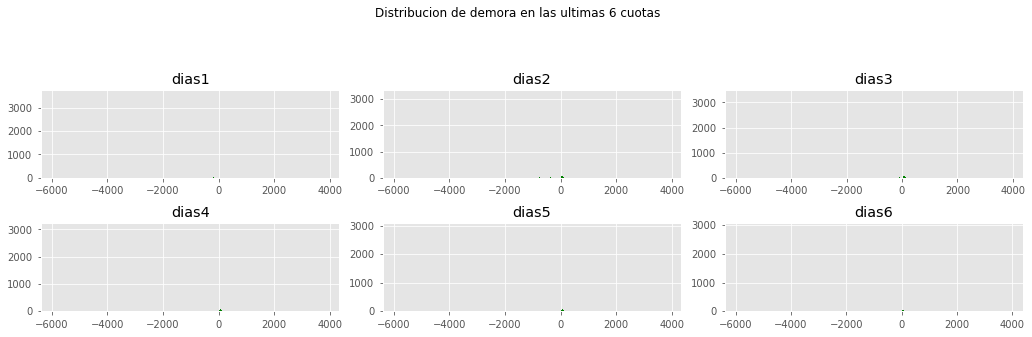

In [26]:
pattern = re.compile("^dias[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribucion de demora en las ultimas 6 cuotas')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

Operaciones que caen en impago 56.9420735176966% de 17574 observaciones


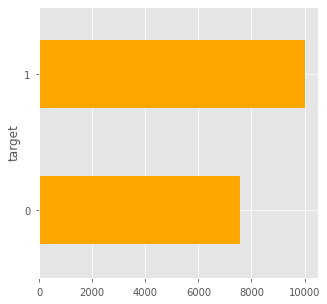

In [27]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['target']).size()

print("Operaciones que caen en impago {}% de {} observaciones".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='orange')

In [28]:
df['edad_cat'] = pd.cut(df['edad'], range(0, 100, 5), right=False)

In [29]:
df['genero'] = df['genero'].astype('category').cat.rename_categories({'F': 'FEMENINO', 'M': 'MASCULINO'})

In [30]:
df['ctipopersona'] = df['ctipopersona'].astype('category').cat.rename_categories({'NAT': 'NATURAL', 'JUR': 'JURIDICA'})

In [31]:
df['cestadocivil'] = df['cestadocivil'].astype('category').cat.rename_categories({1:'SOLTERO', 2:'CASADO', 3:'DIVORCIADO', 4:'VIUDO', 5:'UNION'})

In [33]:
df['cniveleducacion'] = df['cniveleducacion'].astype('category').cat.rename_categories({0:'NINGUNO', 1:'PRIMARIA', 2:'SECUNDARIA', 3:'INTERMEDIA', 4:'SUPERIOR',6:'POSTGRADO',9:'ELEMENTAL'})

In [39]:
df['numerocargas'] = df['numerocargas'].astype('category')
df['cfuenteingreso'] = df['cfuenteingreso'].astype('category')

In [41]:
pattern = re.compile("^dias[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

In [42]:
pattern = re.compile("^diasacum[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

In [43]:
df.head(10)

,edad,genero,cestadocivil,ctipopersona,cactividad_secundaria,tiporesidencia,numerocargas,cniveleducacion,cfuenteingreso,egresos,...,valores6,valoresp1,valoresp2,valoresp3,valoresp4,valoresp5,valoresp6,impago,target,edad_cat
0,39.0,MASCULINO,DIVORCIADO,NATURAL,J09,A,0.0,SECUNDARIA,5.0,1602.46,...,494.34,210.72,351.42,352.48,381.50,429.05,427.11,0,0,"[35, 40)"
1,29.0,MASCULINO,SOLTERO,NATURAL,S05,F,0.0,SECUNDARIA,9.0,124.01,...,196.25,159.12,161.36,195.26,165.93,168.27,194.69,0,0,"[25, 30)"
2,30.0,FEMENINO,SOLTERO,NATURAL,S05,F,0.0,SUPERIOR,9.0,4192.86,...,279.17,312.59,279.17,100.31,279.17,102.68,279.17,0,0,"[30, 35)"
3,33.0,FEMENINO,DIVORCIADO,NATURAL,S05,F,0.0,SECUNDARIA,8.0,125.56,...,246.97,233.72,179.05,244.98,184.13,246.97,252.39,0,0,"[30, 35)"
4,36.0,FEMENINO,CASADO,NATURAL,J09,N,2.0,PRIMARIA,5.0,8585.44,...,1232.98,833.51,845.24,1221.57,869.22,881.46,893.87,0,0,"[35, 40)"
5,44.0,MASCULINO,CASADO,NATURAL,J09,N,2.0,PRIMARIA,5.0,1230.73,...,561.39,406.25,239.61,423.67,397.91,488.76,561.39,0,0,"[40, 45)"
6,33.0,MASCULINO,SOLTERO,NATURAL,S05,F,1.0,SECUNDARIA,9.0,492.10,...,178.01,200.09,178.01,178.01,112.21,113.79,178.01,0,0,"[30, 35)"
7,51.0,MASCULINO,CASADO,NATURAL,S04,N,0.0,SECUNDARIA,7.0,287.74,...,142.41,92.32,93.62,139.53,96.27,141.05,99.01,0,0,"[50, 55)"
8,40.0,MASCULINO,CASADO,NATURAL,S05,N,1.0,SECUNDARIA,9.0,384.73,...,429.01,185.57,171.39,173.53,421.07,451.87,444.62,0,0,"[40, 45)"
9,24.0,FEMENINO,SOLTERO,NATURAL,S05,F,0.0,SECUNDARIA,9.0,137.13,...,143.19,111.33,145.22,114.48,116.10,139.37,119.38,0,0,"[20, 25)"


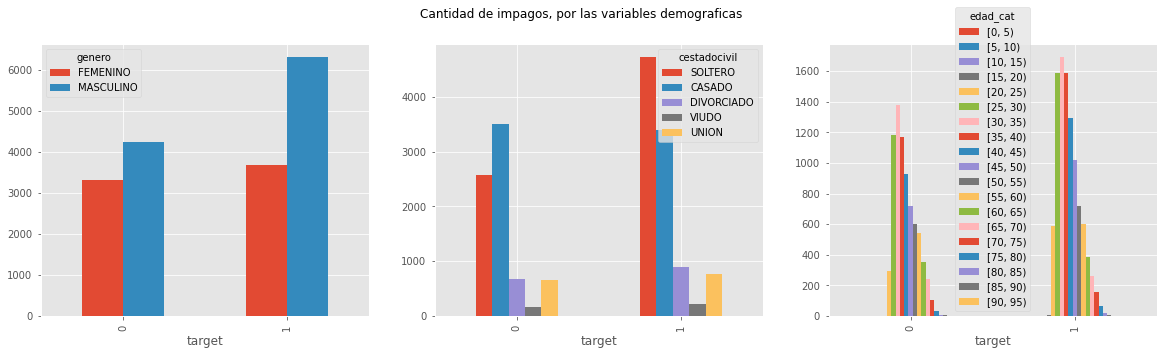

In [44]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Cantidad de impagos, por las variables demograficas')

d = df.groupby(['target', 'genero']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'cestadocivil']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'edad_cat']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

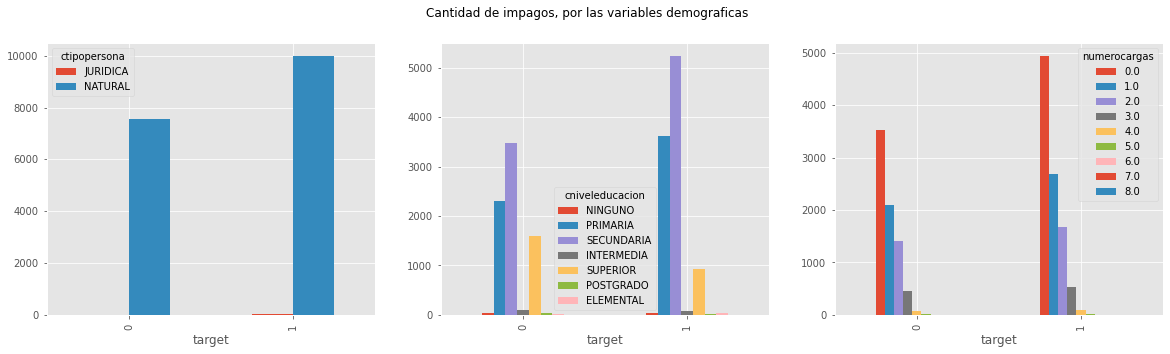

In [45]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Cantidad de impagos, por las variables demograficas')

d = df.groupby(['target', 'ctipopersona']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'cniveleducacion']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'numerocargas']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

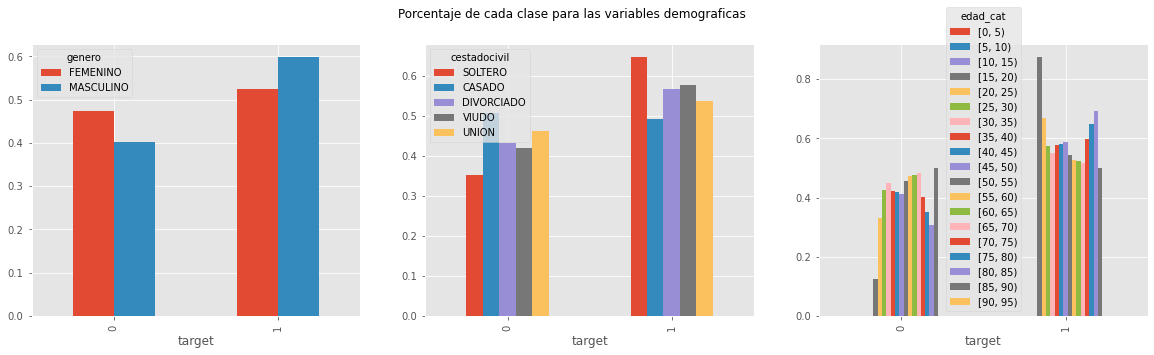

In [46]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Porcentaje de cada clase para las variables demograficas')

d = df.groupby(['target', 'genero']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'cestadocivil']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'edad_cat']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

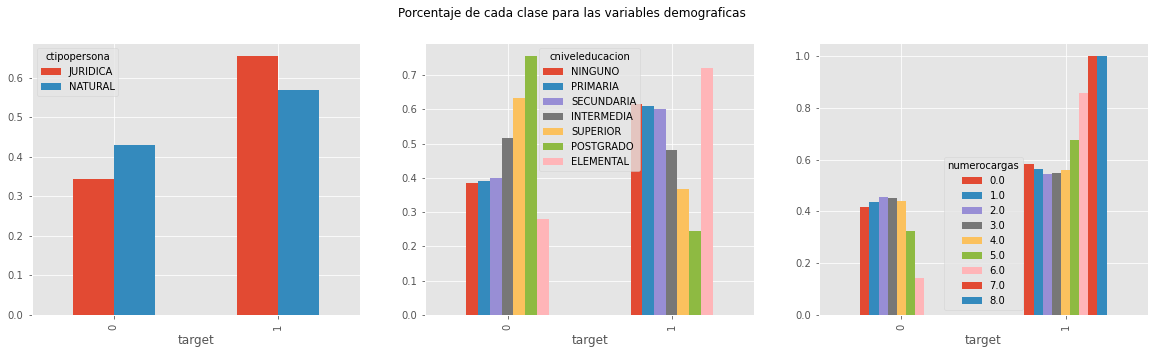

In [47]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Porcentaje de cada clase para las variables demograficas')

d = df.groupby(['target', 'ctipopersona']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'cniveleducacion']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'numerocargas']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

In [48]:
def selcols(prefix, a=1, b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

from patsy import dmatrices

formula  = 'target ~ '

formula += 'C(genero) + C(cestadocivil) +  C(cniveleducacion) + edad'
formula += '+' + '+'.join(selcols('dias'))

formula += '+' + 'C(edad_cat)'
y, X = dmatrices(formula, data=df, return_type='dataframe')
y = y.iloc[:, 1]

In [50]:
X.head(10)

,Intercept,C(genero)[T.MASCULINO],C(cestadocivil)[T.CASADO],C(cestadocivil)[T.DIVORCIADO],C(cestadocivil)[T.VIUDO],C(cestadocivil)[T.UNION],C(cniveleducacion)[T.PRIMARIA],C(cniveleducacion)[T.SECUNDARIA],C(cniveleducacion)[T.INTERMEDIA],C(cniveleducacion)[T.SUPERIOR],...,"C(edad_cat)[T.Interval(50, 55, closed='left')]","C(edad_cat)[T.Interval(55, 60, closed='left')]","C(edad_cat)[T.Interval(60, 65, closed='left')]","C(edad_cat)[T.Interval(65, 70, closed='left')]","C(edad_cat)[T.Interval(70, 75, closed='left')]","C(edad_cat)[T.Interval(75, 80, closed='left')]","C(edad_cat)[T.Interval(80, 85, closed='left')]","C(edad_cat)[T.Interval(85, 90, closed='left')]","C(edad_cat)[T.Interval(90, 95, closed='left')]",edad
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
7,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0


In [51]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [52]:
import warnings
from sklearn.feature_selection import SelectKBest, f_classif

warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))

selector = SelectKBest(f_classif)
selector.fit(X, y)

SelectKBest()

In [53]:
top_indices = np.nan_to_num(selector.scores_).argsort()[-25:][::-1]
selector.scores_[top_indices]
X.columns[top_indices]

Index(['dias5[T.0]', 'dias6[T.0]', 'dias4[T.0]', 'dias3[T.0]', 'dias2[T.0]',
       'dias1[T.0]', 'C(cniveleducacion)[T.SUPERIOR]',
       'C(cestadocivil)[T.CASADO]', 'dias6[T.-61]', 'dias5[T.-61]',
       'dias2[T.6]', 'dias3[T.-61]', 'dias2[T.3]', 'dias3[T.-92]',
       'dias2[T.-61]', 'dias3[T.5]', 'dias2[T.4]', 'dias2[T.5]', 'dias3[T.2]',
       'dias3[T.6]', 'dias1[T.-60]', 'dias1[T.2]', 'dias3[T.3]', 'dias1[T.6]',
       'dias2[T.7]'],
      dtype='object')

In [54]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [55]:
from sklearn.pipeline import Pipeline

preprocess = Pipeline([('anova', selector), ('scale', scaler)])
preprocess.fit(X,y)

X_prep = preprocess.transform(X)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

In [57]:
from sklearn import linear_model

# Create logistic regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LogisticRegression()

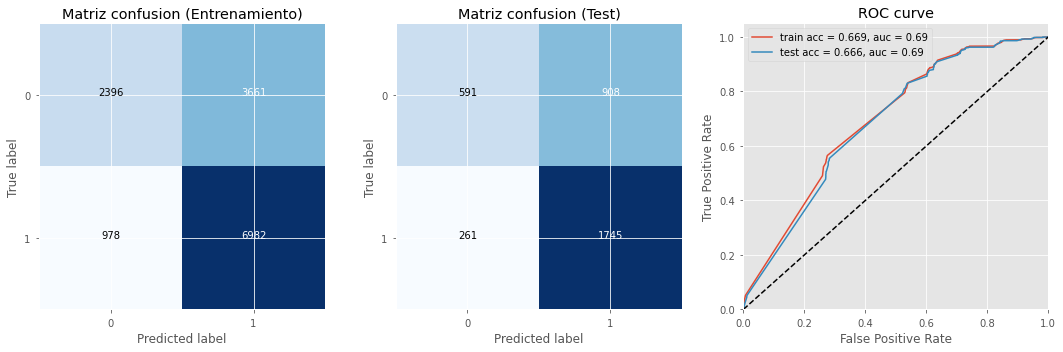

In [58]:
y_train_pred = regr.predict_proba(X_train)[:,1]
y_test_pred = regr.predict_proba(X_test)[:,1]

threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Matriz confusion (Entrenamiento)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Matriz confusion (Test)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=500)

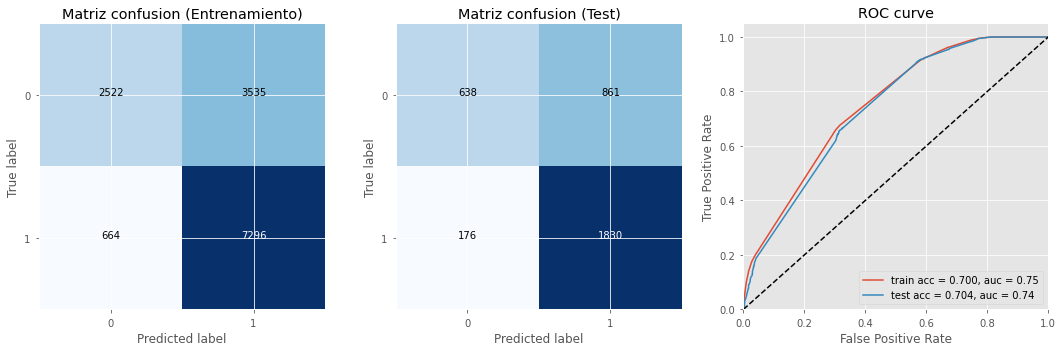

In [60]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = rf.predict_proba(X_train)[:,1]
y_test_pred = rf.predict_proba(X_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Matriz confusion (Entrenamiento)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Matriz confusion (Test)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [61]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_round = 5
evallist  = [(dtest,'eval'), (dtrain,'train')]
param = {'objective':'binary:logistic', 'silent':1, 'eval_metric': ['error', 'logloss']}

bst = xgb.train( param, dtrain, num_round, evallist )

[02:47:04] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-error:0.30471	eval-logloss:0.63887	train-error:0.30634	train-logloss:0.63791
[1]	eval-error:0.30014	eval-logloss:0.61086	train-error:0.30456	train-logloss:0.60828
[2]	eval-error:0.29786	eval-logloss:0.59338	train-error:0.30113	train-logloss:0.58940
[3]	eval-error:0.29872	eval-logloss:0.58269	train-error:0.30063	train-logloss:0.57852
[4]	eval-error:0.29843	eval-logloss:0.57544	train-error:0.30063	train-logloss:0.57033


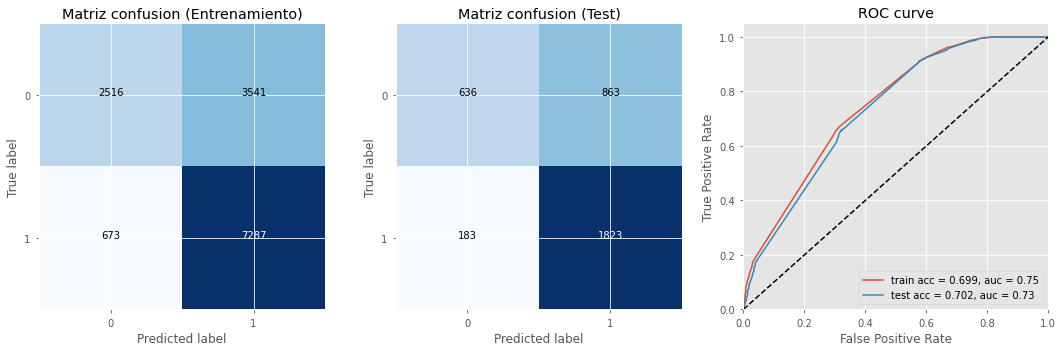

In [62]:
threshold = 0.5
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Matriz confusion (Entrenamiento)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Matriz confusion (Test)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()